In [2]:
!pip install numpy
!pip install gym
!pip install matplotlib

In [2]:
import numpy as np
#import tools
import gym
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1')

print(env.action_space)
print(env.observation_space.n)
num_states = env.observation_space.n
num_actions = env.action_space.n

Discrete(4)
16


In [3]:
def policy_evaluation(policy, env, gamma, theta):
    V = np.zeros(env.observation_space.n)
    while(True):
        diff = 0
        for s in range(num_states):
            v_curr = V[s]
            a = policy[s]
            sum_action = 0
            for p,s_,r,done in env.P[s][a]:
                sum_action += p*(r + gamma*V[s_])

            V[s] = sum_action
            diff = max(diff,abs(v_curr - V[s]))
        if diff < theta:
            break
    return V

In [4]:
def policy_improvement(value_function, env, gamma):

    policy = np.zeros(env.observation_space.n)
    for s in range(num_states):
        Q = np.zeros(num_actions)
        for a in range(num_actions):
            sum_action = 0
            for p,s_,r,done in env.P[s][a]:
                sum_action += p*(r + gamma*value_function[s_])
            Q[a] = sum_action 
        policy[s] = np.argmax(Q)

    return policy

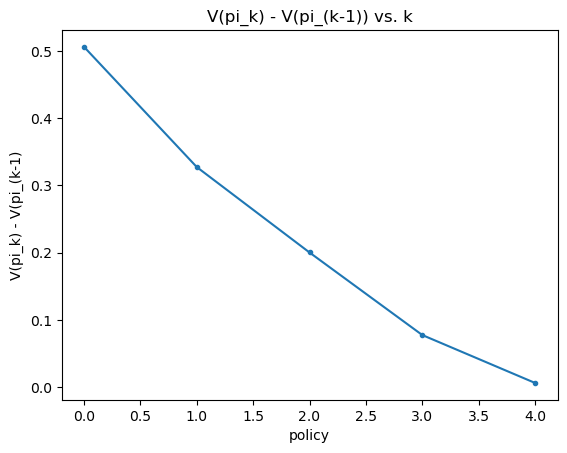

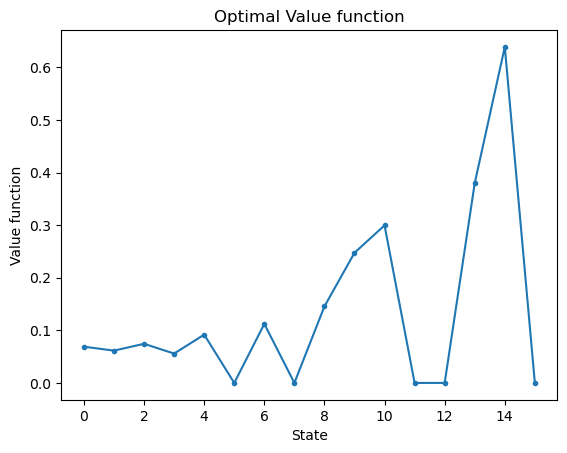

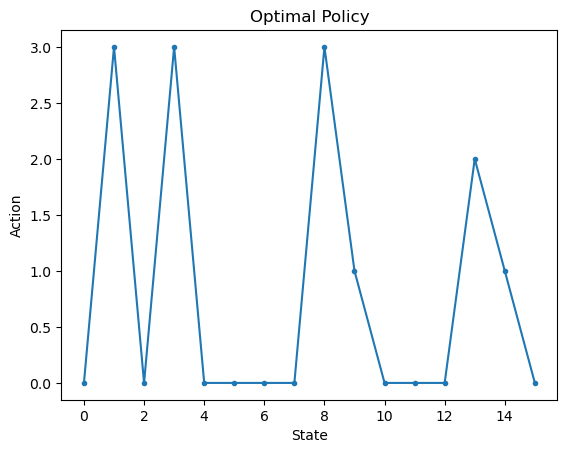

In [9]:
gamma = 0.9
theta = 1e-7
max_iter = 1000
policy = np.zeros(env.observation_space.n)
value_functions = []
for i in range(max_iter):
    old_policy = policy.copy()
    value_function = policy_evaluation(policy, env, gamma, theta)
    policy = policy_improvement(value_function, env, gamma)
    value_functions.append(value_function.copy())
    if (old_policy == policy).all():
        break

norms = []
optimal_policy = policy
for i in range(len(value_functions)-1):
    norms.append(np.linalg.norm(value_functions[i+1] - value_functions[i]))

indices = range(len(norms))
#print(values)
plt.plot(indices, norms, marker = '.')
plt.title("V(pi_k) - V(pi_(k-1)) vs. k")
plt.xlabel("policy")
plt.ylabel("V(pi_k) - V(pi_(k-1)")
plt.show()

plt.plot(range(num_states), value_function, marker = '.')
plt.title("Optimal Value function")
plt.xlabel("State")
plt.ylabel("Value function")

plt.show()

plt.plot(range(num_states), optimal_policy, marker = '.')
plt.title("Optimal Policy")
plt.xlabel("State")
plt.ylabel("Action")

plt.show()

In [10]:
print(value_function)

[0.06889046 0.06141425 0.07440956 0.0558071  0.0918542  0.
 0.11220812 0.         0.14543612 0.24749683 0.29961751 0.
 0.         0.37993582 0.63902011 0.        ]


In [11]:
print(optimal_policy)

[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
